<a href="https://colab.research.google.com/github/ayoubbensakhria/ai-startups/blob/master/AI_startups_v2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize Top AI-Startups and their performance

## Download Data

In [ ]:
import warnings
import numpy as np
import pandas as pd
from datetime import date, timedelta, datetime
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (24, 12)
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [ ]:
non_features = ['Profile URL', 'Website', 'Joining_Month', 'latitude', 'longitude']
df = pd.read_csv('https://raw.githubusercontent.com/ayoubbensakhria/ai-startups/master/data/startups.csv')
df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
df.drop(non_features, axis=1, inplace=True)
df['Total Raised'] = df['Total Raised']/1000000
df['Raised per year'] = df['Total Raised'] / (datetime.now().year - df['Joining_Year'])
df.head()

,Name,Signal,Location,Market,Employees,Stage,Total Raised,Joining_Year,Raised per year
0,Crowdbooster,5,San Francisco,Public Relations,1-10,Seed,0.000,2010,0.000000
1,Samba TV,5,San Francisco,Big Data,201-500,Series A,8.000,2010,0.666667
2,Charity Engine,5,Boston,Big Data Analytics,1-10,0,0.312,2010,0.026000
3,Vufind (DBA DeepVu),5,Berkeley,Enterprise Resource Planning,11-50,0,0.000,2010,0.000000
4,Clearfit,5,Toronto,Human Resources,11-50,Series A,8.700,2011,0.790909


## TOP 50 Companies

In [ ]:
company_df = df.sort_values(by='Total Raised', ascending=False)
company_df.head()

,Name,Signal,Location,Market,Employees,Stage,Total Raised,Joining_Year,Raised per year
69,Kreditech,5,Hamburg,Technology,51-200,0,583.90,2012,58.390000
285,Zymergen,5,Emeryville,Robotics,501-1000,Series C,576.00,2014,72.000000
354,Recursion,5,Salt Lake City,Artificial Intelligence / Machine Learning,51-200,Series C,200.68,2015,28.668571
6,Tala,5,Nairobi,Personal Finance,201-500,Series C,107.40,2011,9.763636
243,AppZen,5,San Jose,Finance Technology,51-200,Series C,102.50,2014,12.812500


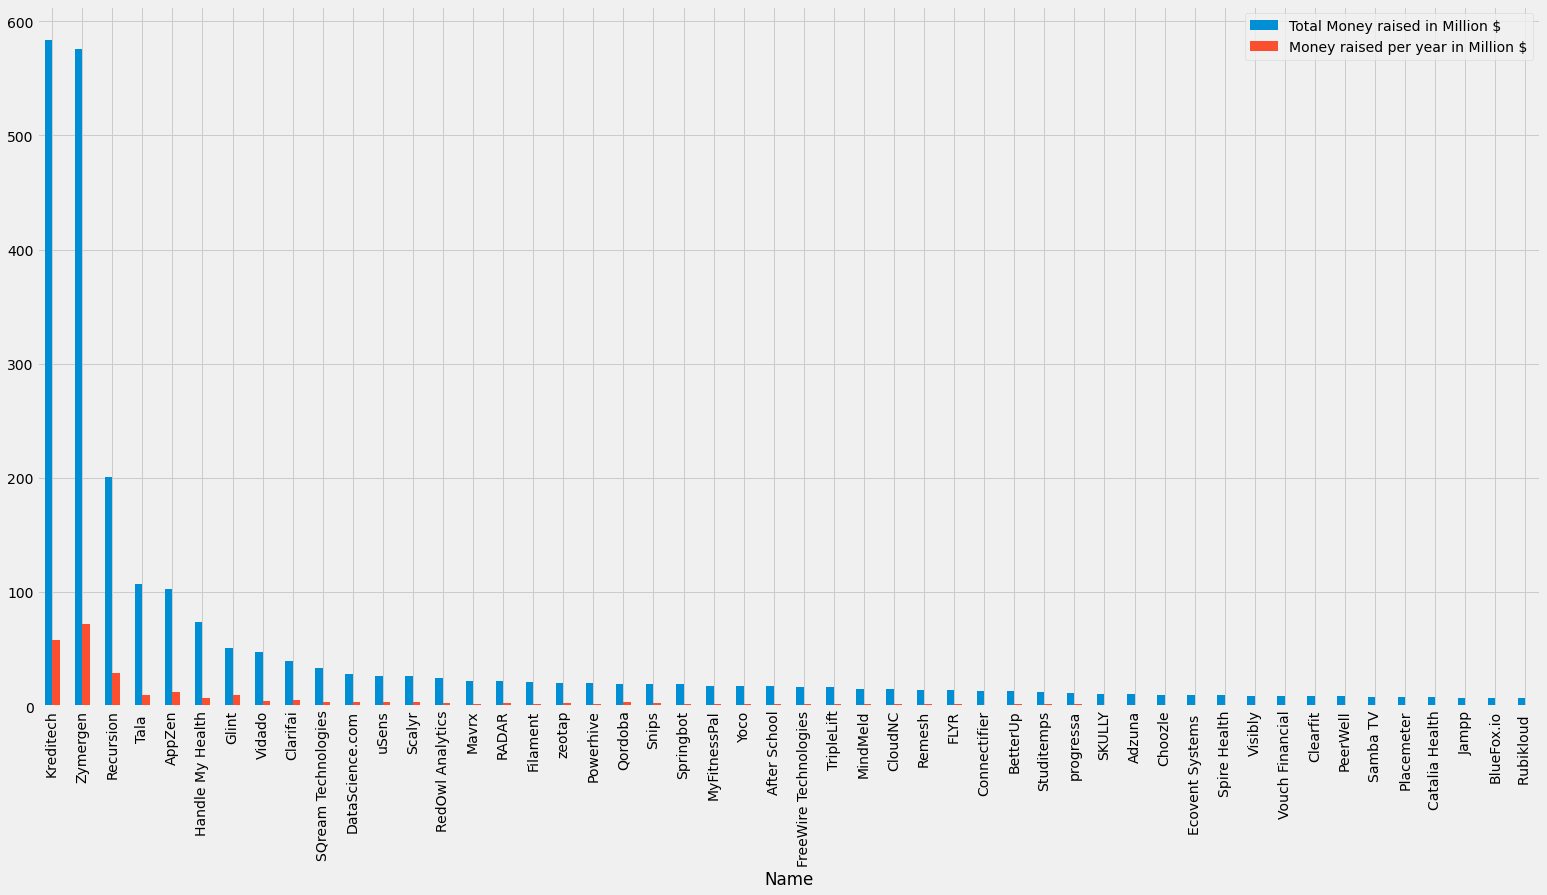

In [ ]:
company_df[0:50].plot.bar(y=['Total Raised', 'Raised per year'], 
                        x='Name',
                        rot=90, 
                        label=['Total Money raised in Million $', 'Money raised per year in Million $'],
                        legend= 'Market'
                        )

## Group by market

In [ ]:
market_df = df.groupby('Market').mean().sort_values(by='Total Raised', ascending=False)
market_df.head()

,Signal,Total Raised,Joining_Year,Raised per year
Market,,,,
Artificial Intelligence / Machine Learning,5.00,200.68000,2015.000,28.668571
Technology,4.50,146.28750,2013.500,14.636250
Robotics,3.75,72.48125,2014.125,9.069358
Personal Finance,4.00,53.70600,2012.000,4.882485
Digital Signage,4.00,26.70000,2015.000,3.814286


## TOP 50 AI Market Niches 

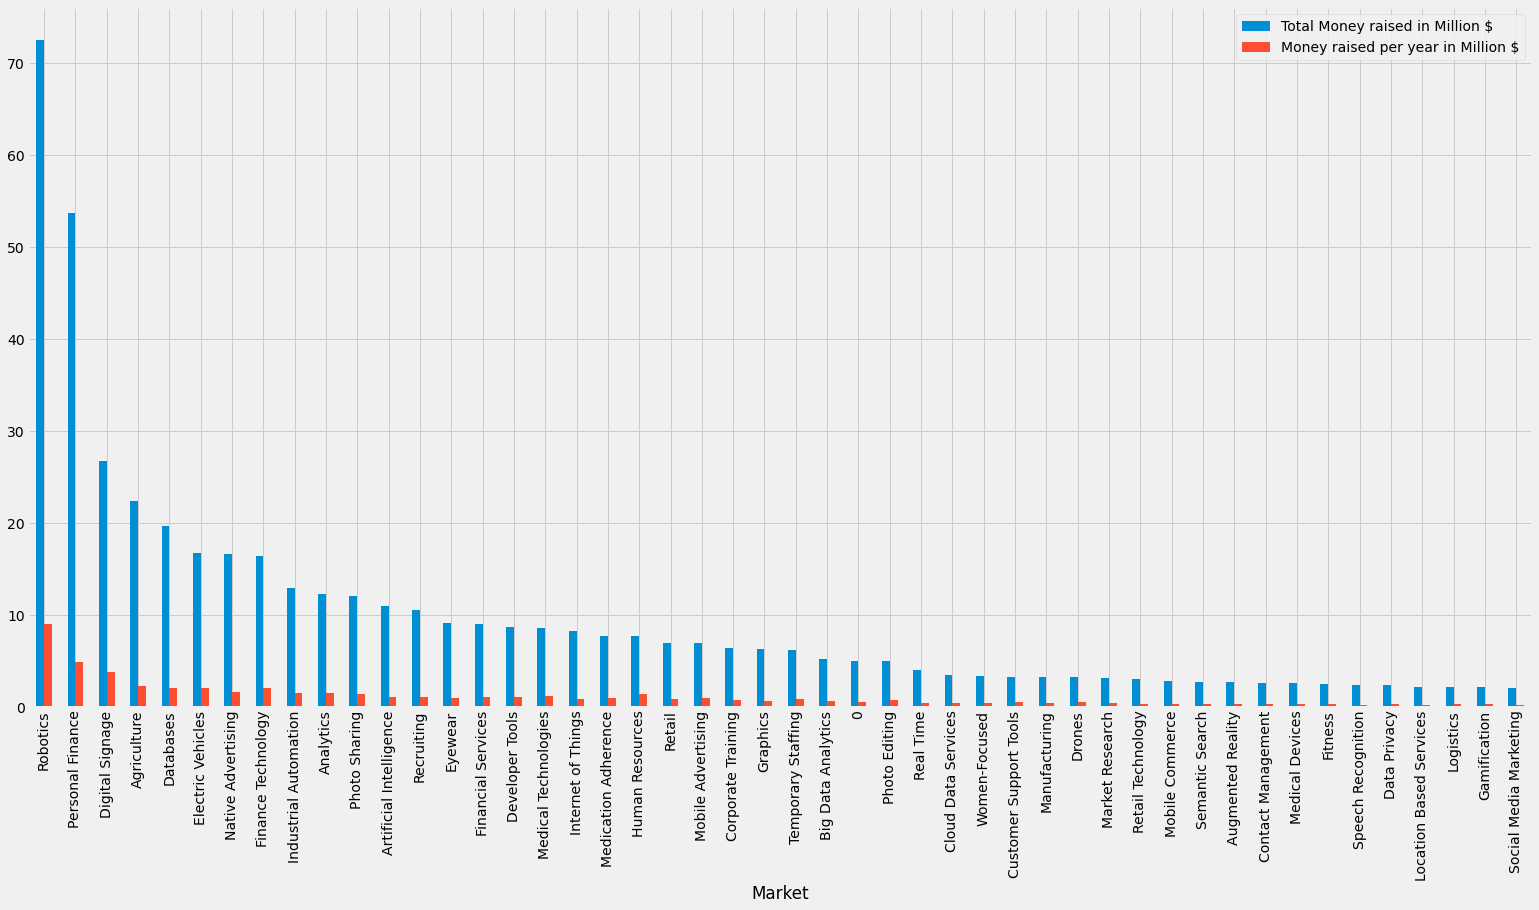

In [ ]:
top_niches = list(market_df[2:50].index)
market_df[2:50].plot.bar(y=['Total Raised', 'Raised per year'], 
                        rot=90, 
                        label=['Total Money raised in Million $', 'Money raised per year in Million $'],
                        legend= 'Market'
                        )

## Europe London, Paris, Berlin (Uk) AI industry

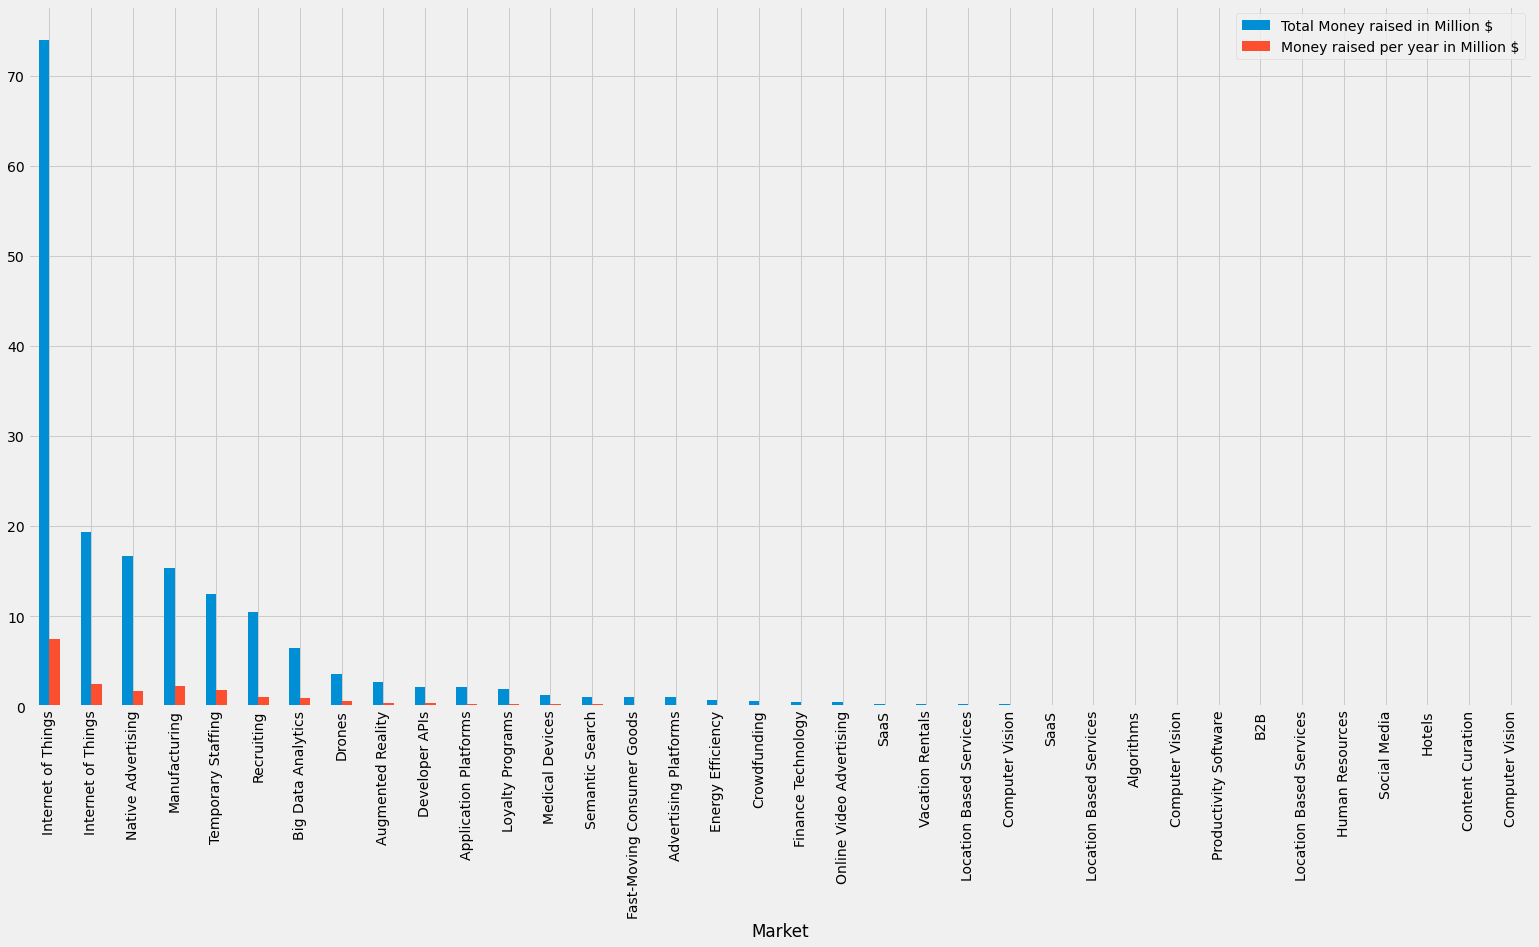

In [ ]:
europe_df = df.loc[df['Location'].isin(['London', 'Paris', 'Berlin'])].sort_values(by='Total Raised', ascending=False)
europe_niches = list(europe_df['Market'][0:50])
europe_df[0:50].plot.bar(
                        x='Market',
                        y=['Total Raised', 'Raised per year'], 
                        rot=90, 
                        label=['Total Money raised in Million $', 'Money raised per year in Million $'],
                        legend= 'Market'
                        )

#Opportunities

[0, 'Photo Editing', 'Retail', 'Mobile Advertising', 'Industrial Automation', 'Speech Recognition', 'Customer Support Tools', 'Graphics', 'Databases', 'Digital Signage', 'Gamification', 'Analytics', 'Data Privacy', 'Developer Tools', 'Medical Technologies', 'Personal Finance', 'Women-Focused', 'Contact Management', 'Social Media Marketing', 'Electric Vehicles', 'Logistics', 'Photo Sharing', 'Fitness', 'Medication Adherence', 'Corporate Training', 'Artificial Intelligence', 'Real Time', 'Market Research', 'Cloud Data Services', 'Robotics', 'Mobile Commerce', 'Agriculture', 'Eyewear', 'Financial Services', 'Retail Technology']


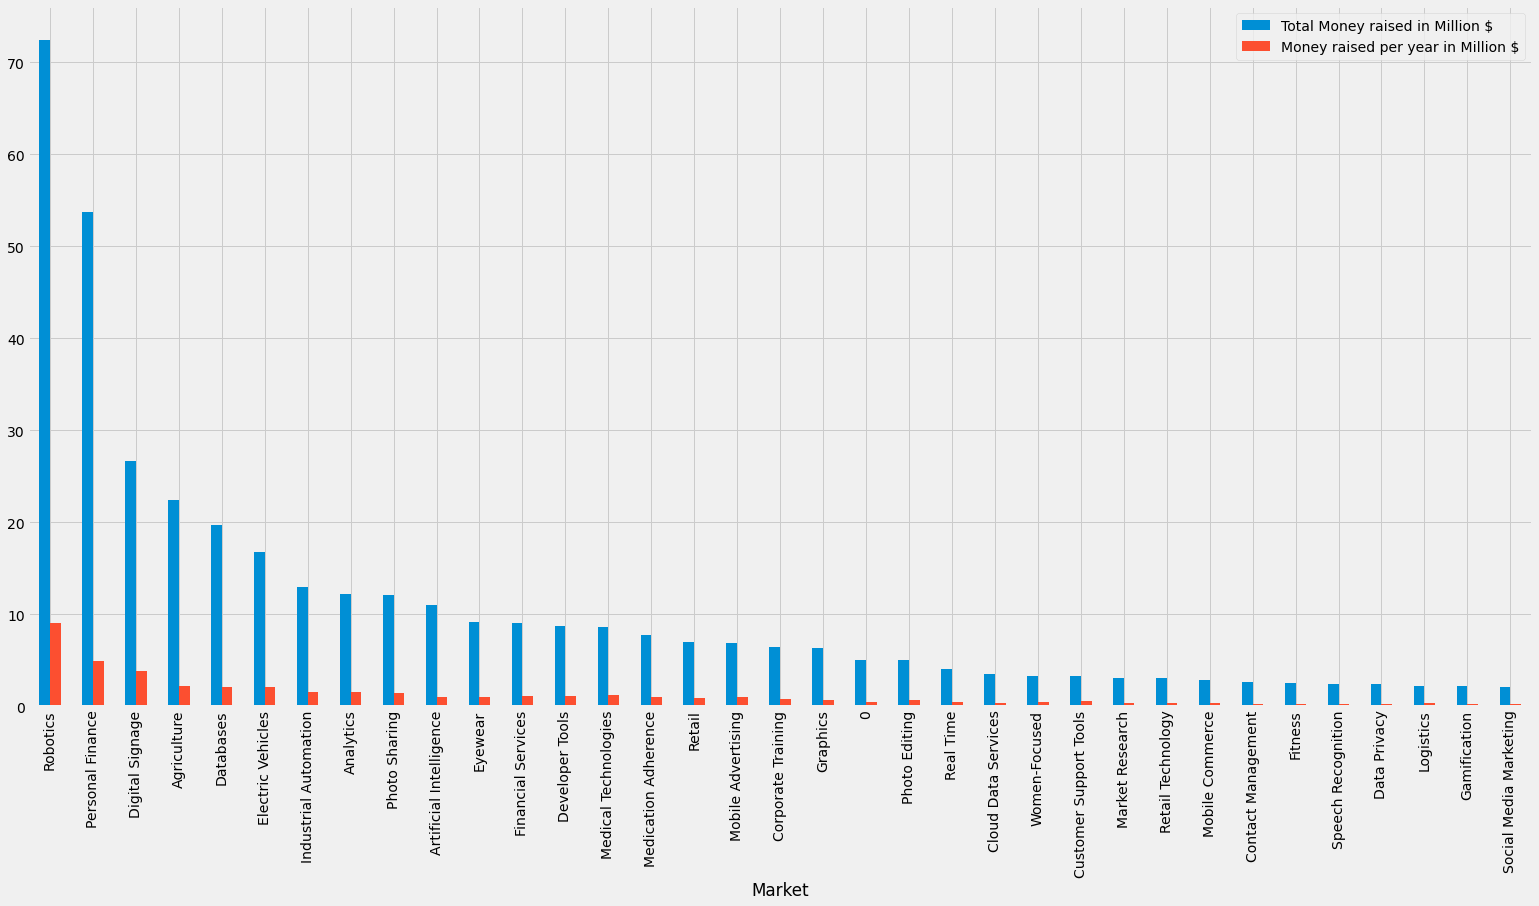

In [ ]:
opportunities = list(set(top_niches) - set(europe_niches))
diff_df = market_df.filter(items = opportunities, axis=0).sort_values(by='Total Raised', ascending=False)
print(opportunities)
diff_df[0:50].plot.bar(y=['Total Raised', 'Raised per year'], 
                        rot=90, 
                        label=['Total Money raised in Million $', 'Money raised per year in Million $'],
                        legend= 'Market'
                        )

#Top Companies with Market in Opportunities

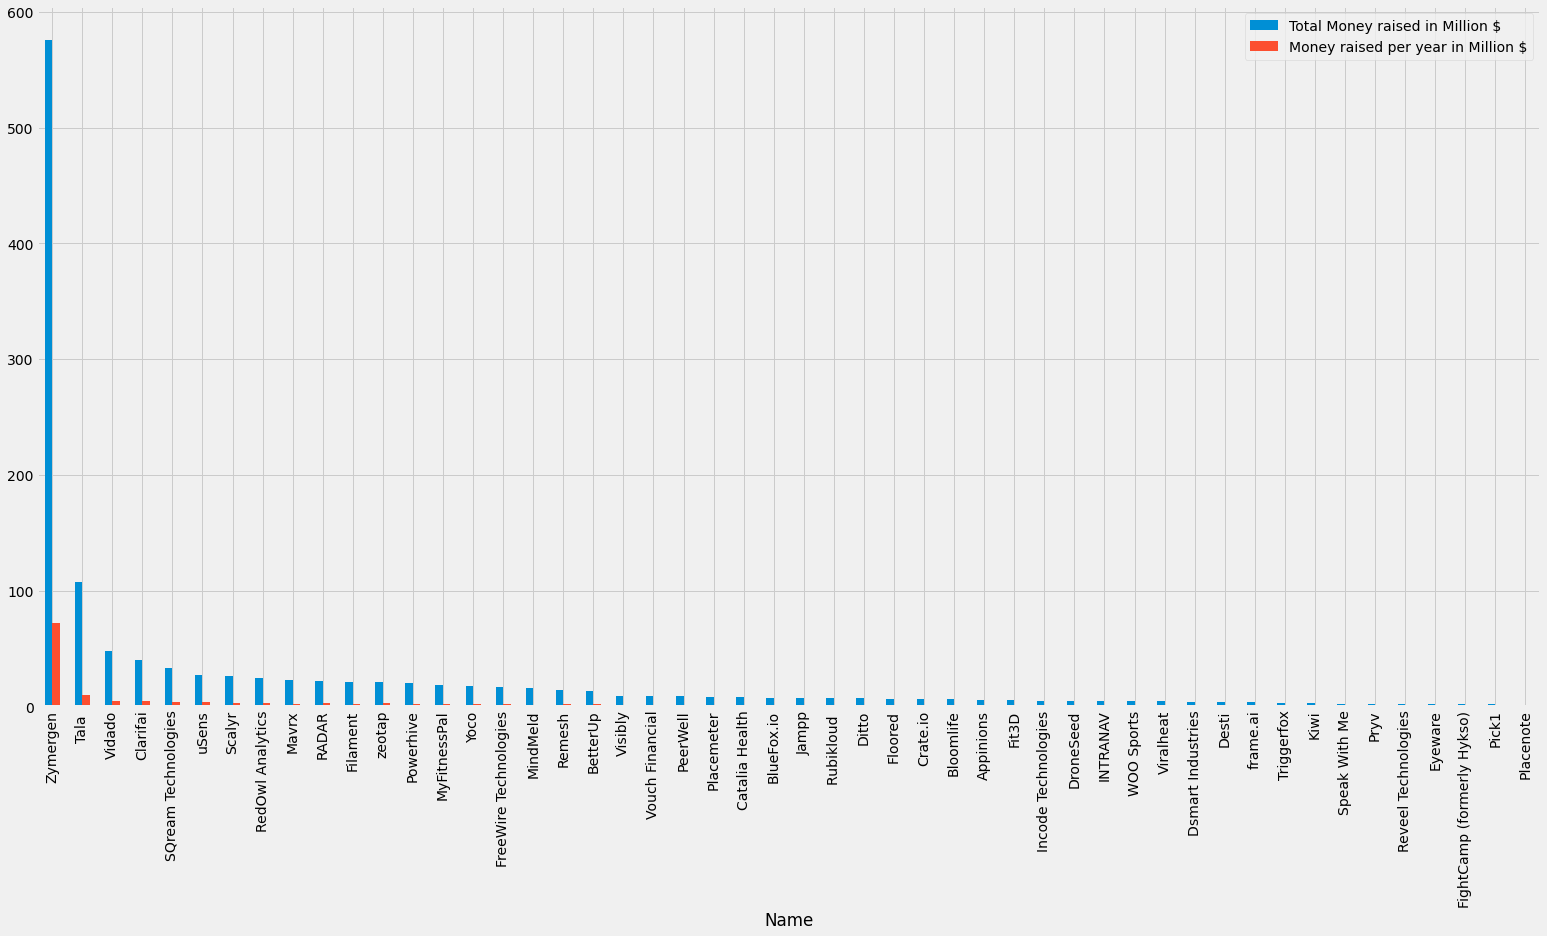

In [ ]:
diff_df_companies = df.loc[df['Market'].isin(opportunities)].sort_values(by='Total Raised', ascending=False)
diff_df_companies[0:50].plot.bar(
                        x='Name',
                        y=['Total Raised', 'Raised per year'], 
                        rot=90, 
                        label=['Total Money raised in Million $', 'Money raised per year in Million $'],
                        legend= 'Market'
                        )


In [ ]:
diff_df_companies.head(50)

,Name,Signal,Location,Market,Employees,Stage,Total Raised,Joining_Year,Raised per year
285,Zymergen,5,Emeryville,Robotics,501-1000,Series C,576.000,2014,72.000000
6,Tala,5,Nairobi,Personal Finance,201-500,Series C,107.400,2011,9.763636
18,Vidado,5,Oakland,Artificial Intelligence,11-50,Series C,47.400,2011,4.309091
318,Clarifai,5,Tysons,Photo Sharing,51-200,0,40.000,2014,5.000000
34,SQream Technologies,4,Israel,Databases,11-50,Series B,33.400,2012,3.340000
401,uSens,4,San Jose,Digital Signage,11-50,Series A,26.700,2015,3.814286
330,Scalyr,5,San Mateo,Developer Tools,51-200,Seed,26.100,2014,3.262500
284,RedOwl Analytics,5,Baltimore,Analytics,51-200,Acquired,24.500,2014,3.062500
78,Mavrx,5,San Francisco,Agriculture,11-50,Series A,22.420,2012,2.242000
112,RADAR,5,San Diego,Retail Technology,11-50,Seed,21.830,2013,2.425556
